<a href="https://colab.research.google.com/github/shaad4224/Hotel-Booking-Analysis-/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
#drive mounting
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
#Load the data
file_path='/content/drive/MyDrive/Colab Notebooks/capstone/Hotel Bookings.csv'
df=pd.read_csv(file_path)

In [8]:
#Top 5 rows to overview the data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
#Last 5 rows
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


**Rows and Columns in dataset**

In [10]:
# shape of the data row and column
df.shape

(119390, 32)

In [11]:
#getting the overall summary statistics for all numerical columns
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


**Observations:**

Total 32 columns are present in the dataset. total observations are 119390



In [12]:
#total column of dataset
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

**Dataset Information**

In [13]:
# basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**The dataframe contains 32 columns. Four columns have missing values. Some columns require conversion of datatypes. Additionally, new columns need to be added from existing ones to make analysis easier**

In [14]:
#find the unique value of hotel
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [15]:
#find the unique value of meal
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [17]:
#find the unique value of reserved room type
df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [54]:
#find the unique value of country
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [18]:
# Creating a copy of a dataset
new_df=df.copy()

In [19]:
# Finding duplicates True = duplicated value
new_df.duplicated().value_counts()

False    87396
True     31994
dtype: int64

In [20]:
#drop the duplicated values
new_df.drop_duplicates(inplace=True)

In [21]:
# Ensuring the column was dropped or not.
new_df.shape

(87396, 32)

In [22]:
 #Finding null values
new_df.isna().sum().sort_values(ascending=False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [23]:
# Dealing with null-values
new_df['company'].fillna(0,inplace=True)
new_df['agent'].fillna(0,inplace=True)
new_df['children'].fillna(0,inplace=True)

In [24]:
#filling null values with others in country
new_df['country'].fillna(0,inplace=True)

In [25]:
# checking null value is replaced or not 
new_df.isna().sum().sort_values(ascending=False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

In [26]:
# length of the children , adult, and babies which is equal to zero.
len(new_df[new_df['adults']+new_df['babies']+new_df['children']==0])

166

In [27]:
# Droping children , adult, and babies which is equal to zero.
new_df.drop(new_df[new_df['adults']+new_df['babies']+new_df['children']==0].index,inplace=True)

In [28]:
# Adding new column by combining some existing columns
new_df['total_people']=new_df['adults']+new_df['babies']+new_df['children']
new_df['total_stay']=new_df['stays_in_week_nights']+new_df['stays_in_weekend_nights']

**`Exploratory Data Analysis**

**1. Booking percentage of hotels**

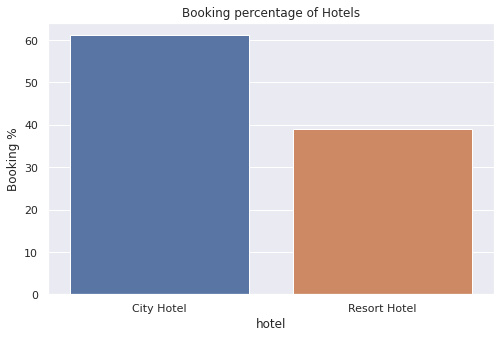

In [29]:
# Making dataframe for booking percentage of Hotels
groupby_hotel = new_df.groupby('hotel')

d1 = (pd.DataFrame((groupby_hotel.size()/new_df.shape[0])*100)
        .reset_index().rename(columns = {0:'Booking %'}))
# plotting graph
sns.set_theme(style="darkgrid")
plt.figure(figsize = (8,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.title('Booking percentage of Hotels')
plt.show()

**Observation :**

Around 60% people prefer City hotel and 40% people prefer Resort hotel

**2. Which Agent makes most no. of bookings**

In [30]:
# Making dataframe of most num of booking by agent
highest_booking = new_df['agent'].value_counts().reset_index()
highest_booking.columns = ['agent','num_of_bookings']
highest_booking.sort_values(by = 'num_of_bookings', ascending = False)

# Dropping 0 in the agent columns coz 0 means no bookings were made
new_df.drop(new_df[new_df['agent']==0].index , inplace = True)

# picking top 10 top booking agent
top_booking_agent = highest_booking[:10]
top_booking_agent

,agent,num_of_bookings
0,9.0,28721
1,240.0,13028
2,0.0,12141
3,14.0,3342
4,7.0,3294
5,250.0,2779
6,241.0,1644
7,28.0,1493
8,8.0,1383
9,1.0,1228


Text(0.5, 1.0, 'Bookings made by agent')

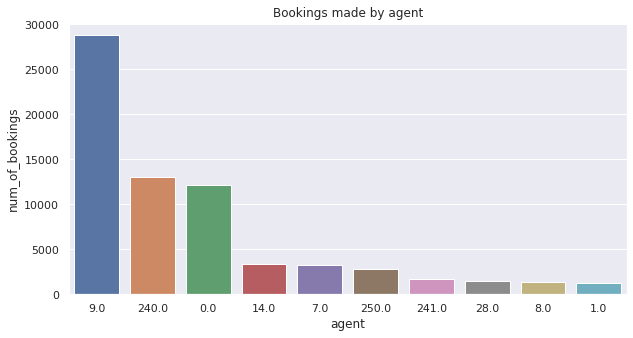

In [31]:
#plotting graph
plt.figure(figsize= (10,5))
sns.barplot(x = top_booking_agent['agent'], y = top_booking_agent['num_of_bookings'],order = top_booking_agent['agent'])
plt.title('Bookings made by agent')

**observation:**

Agent no.9 makes most of the bookings

**3. Booking of city hotel and resort hotel**

In [32]:
#No. of booking at differet hotel type
Number_of_bookings=new_df['hotel'].value_counts().reset_index()
Number_of_bookings.columns=['hotel type','no. of bookings']
Number_of_bookings

,hotel type,no. of bookings
0,City Hotel,47731
1,Resort Hotel,27358


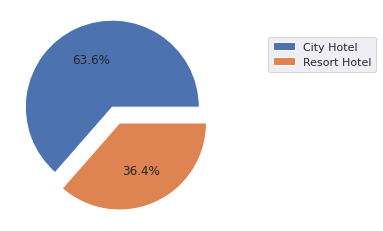

In [33]:
#plot the chart
plt.pie(Number_of_bookings['no. of bookings'],autopct="%1.1f%%",radius=1,explode=[0.10]*2)
plt.legend(labels=Number_of_bookings['hotel type'].value_counts().index.tolist(),loc=(1.2,0.70))
plt.show()

**observation:** 

61.1% booking is city hotel and 38.9% booking is resort hotel

**4. Hotel cancel rate of booking**

In [34]:
#checking booking and cancel booking
cancelled_non_cancelled_booking=new_df['is_canceled'].value_counts().reset_index()
cancelled_non_cancelled_booking

,index,is_canceled
0,0,52628
1,1,22461


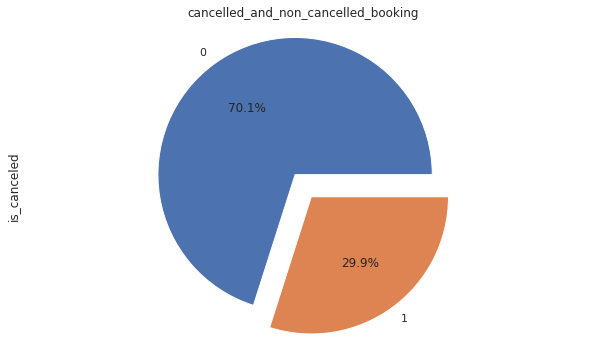

In [35]:
#plot the pie chart
plt.figure(figsize=(10,6))
cancelled_non_cancelled_booking['is_canceled'].plot.pie(autopct="%1.1f%%",radius=1,explode=[0.10]*2)
plt.title('cancelled_and_non_cancelled_booking')
plt.axis('equal')
plt.show()

**observation :** 

70.1% is non cancel booking and 29.9% booking cancel

**5. percentage distribution of car parking space**

In [36]:
#check car parking space
parking_space=new_df['required_car_parking_spaces'].value_counts().reset_index()
parking_space

,index,required_car_parking_spaces
0,0,69675
1,1,5391
2,2,20
3,3,3


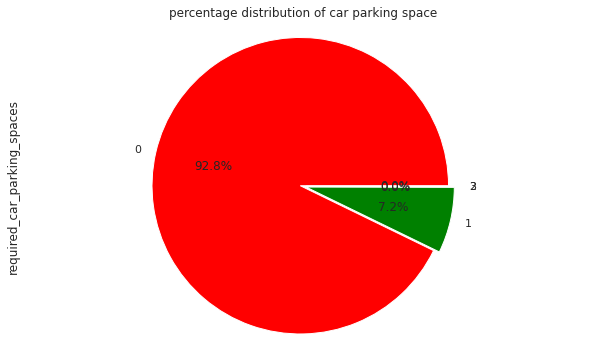

In [37]:
#plot the pie chart
plt.figure(figsize=(10,6))
parking_space['required_car_parking_spaces'].plot.pie(autopct="%1.1f%%",colors=['red','green','blue','orange','purple'],radius=1,explode=[0.02,0.02,0.02,0.02])
plt.title('percentage distribution of car parking space')
plt.axis('equal')
plt.show()

**Observations:**

92.8% people don't need car parking space while 7.2% people need 1 parking space

**6. What is the percentage distribution of "Customer Type"?**

In [38]:
#No. of customer at different type of customer
types_of_customer=new_df['customer_type'].value_counts().reset_index()
types_of_customer.columns=['Types of customers','No. of customers']
types_of_customer

,Types of customers,No. of customers
0,Transient,62513
1,Transient-Party,9001
2,Contract,3125
3,Group,450


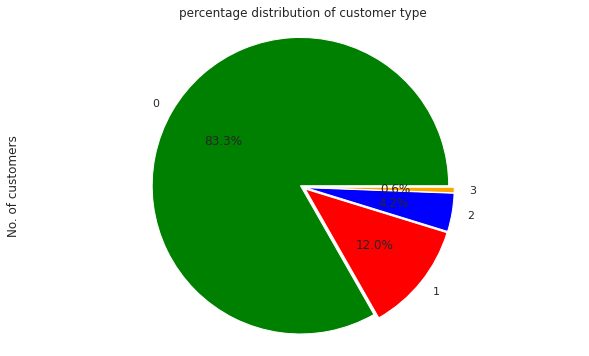

In [39]:
#plot the pie chart
plt.figure(figsize=(10,6))
types_of_customer['No. of customers'].plot.pie(autopct="%1.1f%%",colors=['green','red','blue','orange','purple'],radius=1,explode=[0.02,0.02,0.02,0.02])
plt.title('percentage distribution of customer type')
plt.axis('equal')
plt.show()

**Observation :**

Transient customer type is more which is 82.4 %. Percentage of Booking associated by the Group is vey low

**7. Count of repeated guest?**

In [40]:
#No. of repeated guest
repeated_guest=new_df['is_repeated_guest'].value_counts().reset_index()
repeated_guest

,index,is_repeated_guest
0,0,74029
1,1,1060


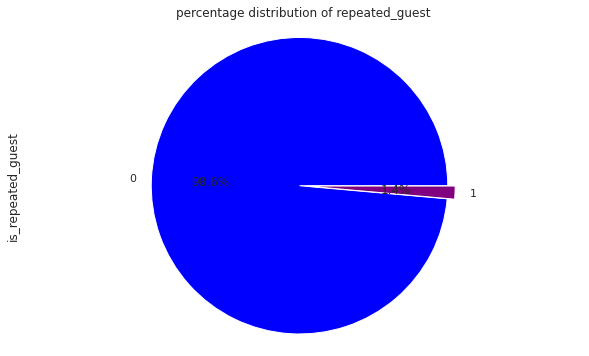

In [41]:
#plot the chart of percentage distribution of repeated guest
plt.figure(figsize=(10,6))
repeated_guest['is_repeated_guest'].plot.pie(autopct="%1.1f%%",colors=['blue','purple'],radius=1,explode=[0.03,0.02])
plt.title('percentage distribution of repeated_guest')
plt.axis('equal')
plt.show()

**observation:**

 Repeated guests are very few which only 1.4 %.

In order to retain the guests, management should take feedbacks from guests and try to improve the services

**8. In which month most of the bookings happened?**

In [42]:
#monthly booking
monthly_bookings=new_df['arrival_date_month'].value_counts()
monthly_bookings

August       10213
July          9163
May           7223
June          6996
April         6918
March         6267
September     5867
October       5608
February      4920
December      4197
November      4059
January       3658
Name: arrival_date_month, dtype: int64

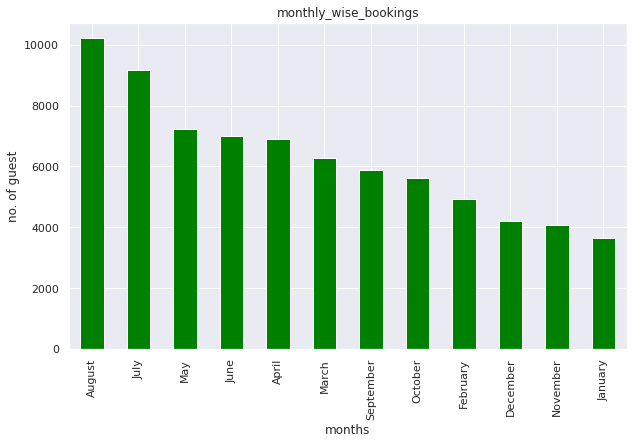

In [43]:
#plot the graph
plt.figure(figsize=(10,6))
monthly_bookings.plot(kind='bar',color='green')
plt.title('monthly_wise_bookings')
plt.xlabel('months')
plt.ylabel('no. of guest')
plt.show()

**observation:**

July and August months had the most Bookings. Summer vaccation can be the reason for the bookings

**9.Most prefered meal by customers**

In [44]:
# Most prefered meal
prefered_meal = new_df['meal'].value_counts().reset_index()
prefered_meal.columns =['Types of meal','No. of Meals']
prefered_meal

,Types of meal,No. of Meals
0,BB,56890
1,SC,9133
2,HB,8408
3,Undefined,361
4,FB,297


Text(0.5, 1.0, 'Most prefered meals by customers')

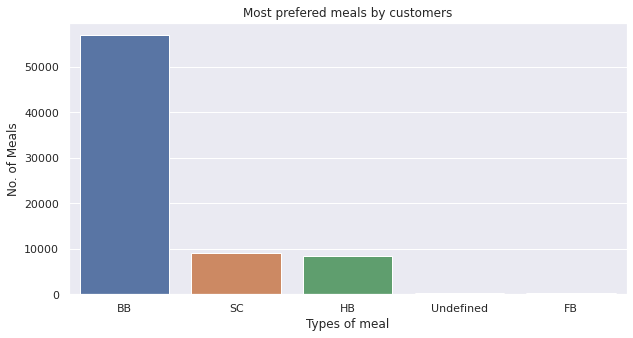

In [45]:
#plot the graph
plt.figure(figsize= (10,5))
sns.barplot(x = prefered_meal['Types of meal'], y = prefered_meal['No. of Meals'], order=prefered_meal['Types of meal'])
plt.title('Most prefered meals by customers')

1.BB - (Bed and Breakfast) 2.HB - (Half Bread) 3.FB - (Full Board) 4.SC - (Self Catering)

**Observation :**

Above chart shows most of the customers prefer BB type Meal.

**10. Most preferred room type by the customers**

In [46]:
# Most preferred room type by the customers
most_prefered_room=new_df['reserved_room_type'].value_counts().reset_index()
most_prefered_room.columns=['room_type','No.of reserved room type']
most_prefered_room

,room_type,No.of reserved room type
0,A,47635
1,D,15953
2,E,5069
3,F,2478
4,G,1776
5,B,893
6,C,756
7,H,529


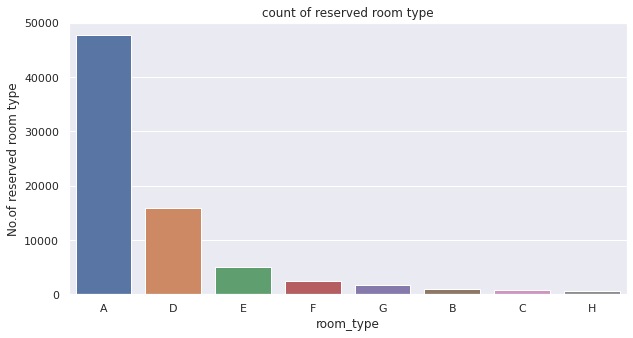

In [47]:
#plot the bar graph
plt.figure(figsize= (10,5))
sns.barplot(x = most_prefered_room['room_type'], y = most_prefered_room['No.of reserved room type'],order = most_prefered_room['room_type'])
plt.title('count of reserved room type')
plt.show()

**Observation :**

Most preferred Room type is 'A' while 'H' is least preferred

**11. Which Hotel type has the highest ADR?**

In [48]:
#highest adr at diffrent hotel type
highest_adr=new_df.groupby(['hotel'])['adr'].mean().reset_index()
highest_adr

,hotel,adr
0,City Hotel,113.714408
1,Resort Hotel,104.249976


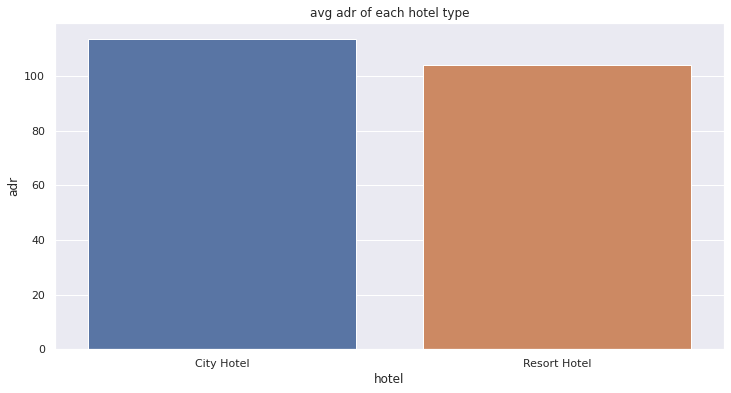

In [49]:
#plot the graph
plt.figure(figsize=(12,6))
sns.barplot(x=highest_adr['hotel'],y=highest_adr['adr'],order=highest_adr['hotel'])
plt.title('avg adr of each hotel type')
plt.show()

**Observation :**

City Hotel has the highest ADR. This means City Hotels are generating more revenue than the resort hotels. More the ADR, more is the revenue.

**12. ADR across different market segment**

In [50]:
# ADR across market segment
adr_market_segment=new_df.groupby(['market_segment','hotel'])['adr'].mean().reset_index()
adr_market_segment

,market_segment,hotel,adr
0,Aviation,City Hotel,99.208333
1,Complementary,City Hotel,2.040000
2,Complementary,Resort Hotel,4.301915
3,Corporate,City Hotel,86.290505
4,Corporate,Resort Hotel,53.301601
5,Direct,City Hotel,127.448865
6,Direct,Resort Hotel,132.392448
7,Groups,City Hotel,84.083236
8,Groups,Resort Hotel,62.902939
9,Offline TA/TO,City Hotel,87.466431


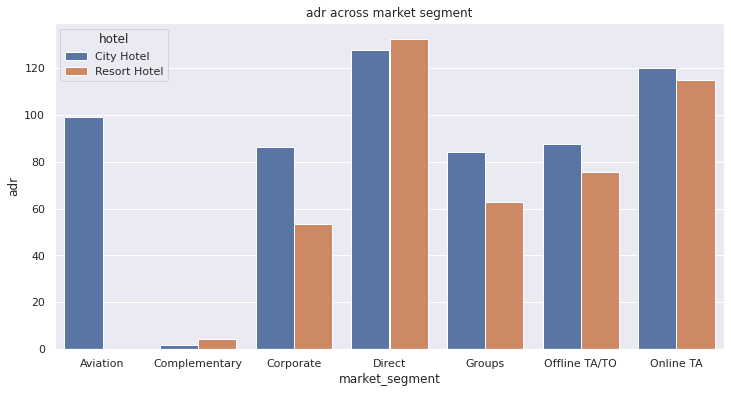

In [51]:
#plot the graph
plt.figure(figsize=(12,6))
sns.barplot(x=adr_market_segment['market_segment'],y=adr_market_segment['adr'],hue=adr_market_segment['hotel'])
plt.title('adr across market segment')
plt.show()

**Obseravtion :**

'Direct' and 'Online TA' are contributing the most in both types of hotels.

Aviation segment should focus on increasing the bookings of 'City Hotel'

**13.Number of guest according to different country :**

In [52]:
#number of guest according to different country
new_df['country'].value_counts().reset_index()

,index,country
0,PRT,19536
1,GBR,9564
2,FRA,8311
3,ESP,6709
4,DEU,5149
...,...,...
170,PLW,1
171,MWI,1
172,GLP,1
173,CYM,1


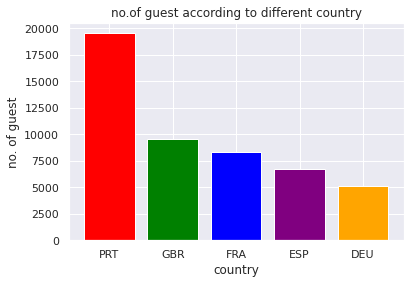

In [53]:
#plot the graph
x=['PRT','GBR','FRA','ESP','DEU']
y=[19536,9564,8311,6709,5149]
plt.bar(x,y,color=['red','green','blue','purple','orange'])
plt.ylabel('no. of guest')
plt.xlabel('country')
plt.title('no.of guest according to different country')
plt.show()

**observation:**

most of the guest is PRT and GBR country while DEU has the least